# Logistic Regression of Credit Defaults
## MSDS 7349 - Section 401
## Lab 1

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

# Table of Contents
* [Team Members](#Team-Members)
* [Business Understanding](#Business-Understanding)
* [Data Meaning Type](#Data-Meaning-Type)
* [Data Quality](#Data-Quality)
* [Simple Statistics](#Simple-Statistics)
* [Visualize Attributes](#Visualize-Attributes)
* [Explore Joint Attributes](#Explore-Joint-Attributes)
* [Explore Attributes and Class](#Explore-Attributes-and-Class)
* [New Features](#New-Features)
* [Exceptional Work](#Exceptional-Work)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)
* [Kevin Cannon](https://github.com/kcannon2)
* [Ernesto Carrera Ruvalcaba](https://github.com/ecarrerasmu)
* [Adam Tschannen](https://github.com/adamtschannen)

# <a name="Business-Understanding"></a>Business Understanding
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.*

> The credit default data set is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). It has 30,000 records with 24 attributes. The records reflect the payment data from an important Taiwanese bank during October, 2005 (Yeh & Lien 2475).

> The purpose of the data set was to tackle the issue of forecasting the probability of default. In particular, the researchers of this data set sought to determine if the "estimated probability of default produced from data mining methods... (could) represent the "real" probability of default" (Yeh & Lien 2473).

> One way to define and measure the outcomes from the data set would be to perform a logistic regression. In doing so, one could predict if a customer would default on a credit payment in the next month."From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients"

> In order to measure the effectiveness of the prediction algorithm, the data set will be randomly split into training and test data sets using a stratified cross validation procedure. Because of the significantly high number of subjects classified as “0” there is potential for the algorithm to predict a high number of false negatives becaue of the class imbalance. The stratified cross validation procedure will ensure the training data sets will have approximately the same amount of subjects who defaulted as those who did not and will subsequently protect the algorithm against false negative predictions. Consequently, the accuracy of the prediction algorithm can be measured with real world data and a succesful algorithm will have an R^2 above .75.


# <a name="Data-Meaning-Type"></a>Data Meaning Type
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

| Variable | Variable Type | Description |
| :------: | :-----------: | :----- |
| LIMIT_BAL | int64 | The amount of the given credit in New Taiwan dollars.<br/>It includes both the individual consumer credit and his/her family (supplementary) credit |
| SEX | int64 | Defines each subjects gender with:<ul><li>1 = Male</li><li>2 = Female</li></ul> |
| EDUCATION | int64 | Represents each subject level of education with:<ul><li>1 = Graduate School</li><li>2 = University</li><li>3 = High School</li><li>4 = Other</li></ul> |
| MARRIAGE | int64 | Defines the person's relationship status by:<ul><li>1 = Married</li><li>2 = Single</li><li>3 = Other</li></ul> |
| AGE | int64 | Defines how old each person is in years |
| PAY_0 | int64 | The repayment status in September, 2005 |
| PAY_2 | int64 | The repayment status in August, 2005 |
| PAY_3 | int64 | The repayment status in July, 2005 |
| PAY_4 | int64 | The repayment status in June, 2005 |
| PAY_5 | int64 | The repayment status in May, 2005 |
| PAY_6 | int64 | The repayment status in April, 2005 |
| BILL_AMT1 | int64 | The repayment status in September, 2005 |
| BILL_AMT2 | int64 | The repayment status in August, 2005 |
| BILL_AMT3 | int64 | The repayment status in July, 2005 |
| BILL_AMT4 | int64 | The repayment status in June, 2005 |
| BILL_AMT5 | int64 | The repayment status in May, 2005 |
| BILL_AMT6 | int64 | The repayment status in April, 2005 |
| PAY_AMT1 | int64 | The amount paid in September, 2005 |
| PAY_AMT2 | int64 | The amount paid in August, 2005 |
| PAY_AMT3 | int64 | The amount paid in July, 2005 |
| PAY_AMT4 | int64 | The amount paid in June, 2005 |
| PAY_AMT5 | int64 | The amount paid in May, 2005 |
| PAY_AMT6 | int64 | The amount paid in April, 2005 |
| default payment next month | int64 | A binary value indicating default status with:<ul><li>0 = Customer has defaulted</li><li>1 = Customer has not defaulted</li></ul>|

The scale for the PAY_0-PAY_6 above is as follows:

-1 = pay duly

1 = payment delay for one month

2 = payment delay for two months

3 = payment delay for two months

4 = payment delay for two months

5 = payment delay for two months

6 = payment delay for two months

7 = payment delay for two months

8 = payment delay for eight months

9 = payment delay for nine months and above. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statistics as st
import csv as csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

#filepath = "/Users/Jostein/Grad School/SMU/7331/project1/credit-default/data/default of credit card clients.xls"
filepath = "/Users/ernestcarrera/Documents/Master Data Science/DataMining/Lab1/default of credit card clients.xls"
#filepath = "C:\python\credit-default\data\default of credit card clients.xls"

credit = pd.read_excel(filepath, header=1, skiprows=0)

# Rename column(s)
credit = credit.rename(columns={'default payment next month': 'default_next_m', 'PAY_0': 'PAY_1'})

# <a name="Data-Quality"></a>Data Quality
*Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.*



>The data set does not have missing values. The number of missing values per variable is presented below:

In [4]:
#### Validating we do not have missing values
credit.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_next_m    0
dtype: int64

> The field "ID" in the data set represents customers. To validate the presence of duplicates in the data, we counted the number of duplicates by the field "ID". There are not duplicates records.

In [5]:
########checking for duplicates in the ID
credit['is_duplicated']=credit.duplicated('ID')
print ("The number of duplicates is:")
print (credit['is_duplicated'].sum())

credit.drop('is_duplicated', axis=1, inplace=True)


The number of duplicates is:
0


>The variables SEX, MARRIAGE, EDUCATION, PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 are categorical with numeric values encoded. We will validate that the data dictionary provided covers all of the values in the data. The plots that follow show the number of cases for each category to visualize their representativeness.

SEX


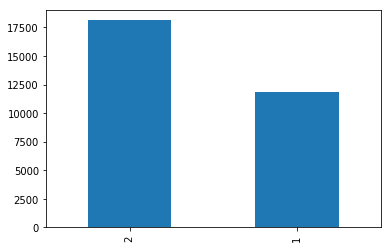

EDUCATION


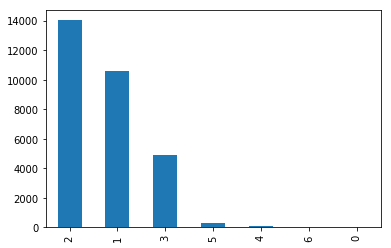

MARRIAGE


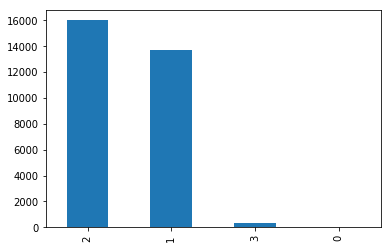

PAY_1


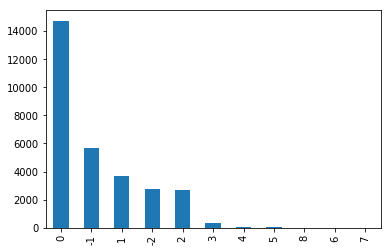

PAY_2


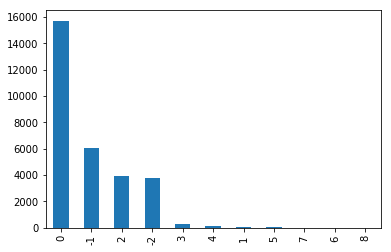

PAY_3


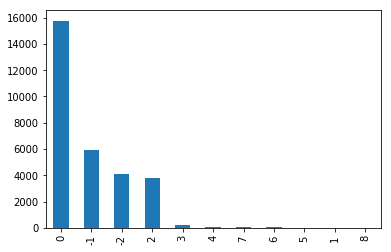

PAY_4


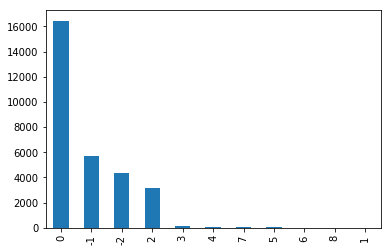

PAY_5


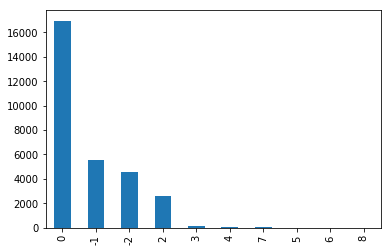

PAY_6


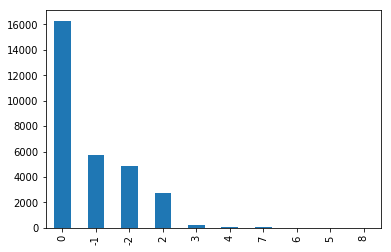

In [6]:
vars_to_plot_separate=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for index,plot_vars in enumerate(vars_to_plot_separate):
    print (plot_vars)
    default_gen_g=credit.groupby(by=plot_vars)
    credit[plot_vars].value_counts().plot(kind='bar')
    plt.show()


>  The variable "SEX" presents the value of 1 and 2, the former represent Males and the later FEMALES. The number of loans granted to females are greater than the ones granted to males.

> The values 0,5 and 6 for the variable "EDUCATION" are not defined in the data dictionary. However, they do not represent a concern given the low number of observations in each of these categories. We decided to include these values in the category "OTHER" (encoded with 4). In order to support this decision,  we have identified by visual inspection that the distribution of the amount of the credit given (variable LIMIT_BAL) broken down by "SEX" of the categories of 0, 4, 5 and 6 are to some extent similar. The violin plot below exhibits how similar the distributions are. We created the variable "EDUCATION_INP" assigning the value of 4 (Others) to the values 0,5 and 6. It is also exhibited a table with the new distribution of the variable after imputing the values, as expected, this category shows very low number of observations.

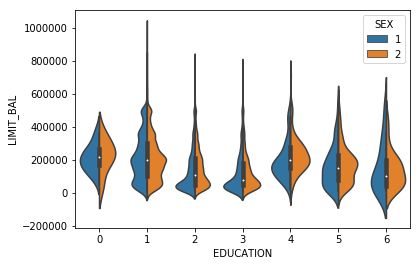

col_0          count
EDUCATION_INP       
1              10585
2              14030
3               4917
4                468


In [33]:
# Source:
# http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot


#plt.figure()
ax = sns.violinplot(x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
#plt.savefig('/Users/ernestcarrera/Documents/Master Data Science/DataMining/Lab1'
#               + '/plots/violin-limitbalance-by-education-per-sex')
plt.show()

#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 4, THAT REPRESETNS OTHER
credit['EDUCATION_INP']=credit['EDUCATION']

credit.loc[credit['EDUCATION'] > 4, 'EDUCATION_INP'] = 4
credit.loc[credit['EDUCATION'] == 0, 'EDUCATION_INP'] = 4



my_tab = pd.crosstab(index=credit["EDUCATION_INP"],  # Make a crosstab
                              columns="count")      # Name the count column

print (my_tab)

> The value of "0" in the variable "MARRIAGE" is not defined. The number of observations in this category is very low and it does not represent a concern. We assumed this is a data entry error and we imputed the value of "2" (single) since it is the category with the highest frequency (mode). We created the variable "MARRIAGE_INP" assigning the value of 2 (SINGLE) to the values of 0. It is also exhibited a table with the new distribution of the variable after imputing the values, as expected, this category shows very low number of observations.

In [34]:
####FOR MARRIAGE
#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 2, THAT REPRESETNS SINGLE, since the value of 0 is not defined in
#the data dictionary
credit['MARRIAGE_INP']=credit['MARRIAGE']


credit.loc[credit['MARRIAGE'] == 0, 'MARRIAGE_INP'] = 2



my_tab = pd.crosstab(index=credit["MARRIAGE_INP"],  # Make a crosstab
                              columns="count")      # Name the count column

print (my_tab)

col_0         count
MARRIAGE_INP       
1             13659
2             16018
3               323


> The values of -2 and 0 are not defined for the variables PAY_1,...PAY6. The lack of a description for the value of "0" is critical, given the high proportion of records that fall in this category, We assumed that this is an error in the label and the values of 0 and -2 should be categorized as -1, that represents that the customer has payed duly. In order to validate this assumption, we plotted the default rate for all the categories of the variable PAY_1 to demonstrate that they exhibit very similar default rate and grouping them is valid. The variable PAY_1 is shown below and confirms this assumption.

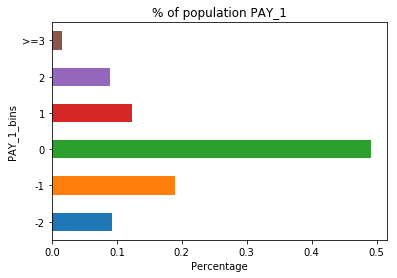

The default rate for each bin is exhibited in both the table and plot below:
PAY_1_range
-2     0.132294
-1     0.167781
0      0.128113
1      0.339479
2      0.691414
>=3    0.719222
Name: default_next_m, dtype: float64


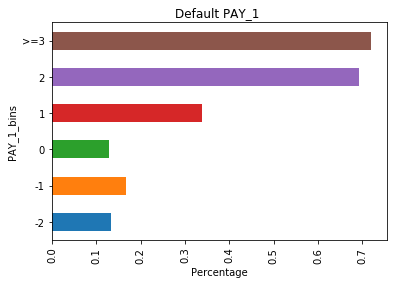

In [37]:

########### CREATING A FUNCTION TO EXECUTE BIVARIATES
def bivariate_v1(var_name,RangeName,CutOff,NumBins,BinLabel,var_x,var_y,title1,title2):
#def bivariate_v1(NumBins): 
    #Creating the BINS
    credit[RangeName]=pd.cut(var_name,CutOff,NumBins,labels=BinLabel)
    #Grouping by the BINS variable
    default_g=credit.groupby(by=[RangeName])
    #% of POPULATION
    bins_percentage=default_g[RangeName].count()/credit[RangeName].count()
   
    
    #CHART WITH THE %OF POPULATION WITH THE BINS
    #print bins_percentage
    ax=bins_percentage.plot(kind='barh')
    plt.title(title1)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.show()
    
    ### default rate
    t=default_g.default_next_m.sum()/default_g.default_next_m.count()
    print("The default rate for each bin is exhibited in both the table and plot below:")
    print(t)  


    ax=t.plot(kind='barh')
    plt.title(title2)
    plt.xlabel(var_x)
    
    plt.xticks(rotation='vertical')
    
    plt.ylabel(var_y)
    plt.show()
    
bivariate_v1(credit.PAY_1,'PAY_1_range',[-2.1,-2,-1,0.01,1.1,2,10],6,['-2','-1','0','1','2','>=3'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')

>After testing the soundness of our assumption, we created new variables PAY_1_range,PAY_2_range,....PAY_6_range to group the values of -2,-1 and 0 in one single group called "Pay duly", the code that follows executes this task. Given the low number of observations for the delays with more or equal than 1 month, we have grouped them to make the bin more representative while keeping the expected default rate for the bin.

>We also present the proportion of observations for the new categories and other graph to exhibit the default rate. All of the charts confirm the low default rate for the group "Pay duly".

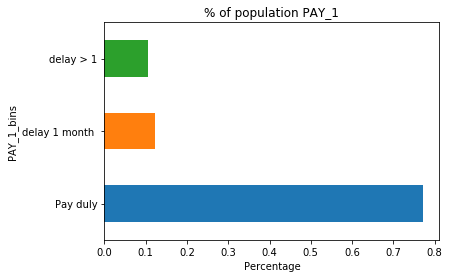

The default rate for each bin is exhibited in both the table and plot below:
PAY_1_range
Pay duly          0.138340
delay 1 month     0.339479
delay > 1         0.695527
Name: default_next_m, dtype: float64


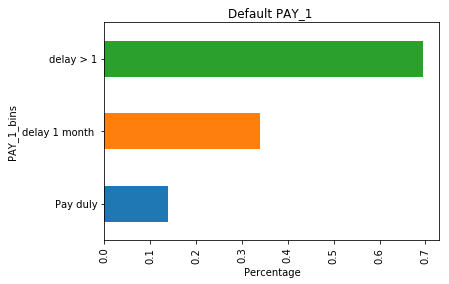

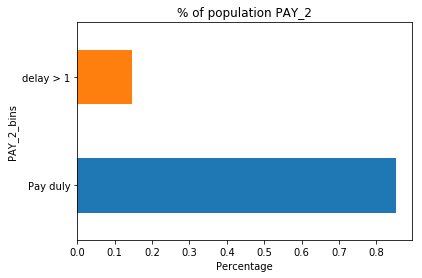

The default rate for each bin is exhibited in both the table and plot below:
PAY_2_range
Pay duly     0.162759
delay > 1    0.560317
Name: default_next_m, dtype: float64


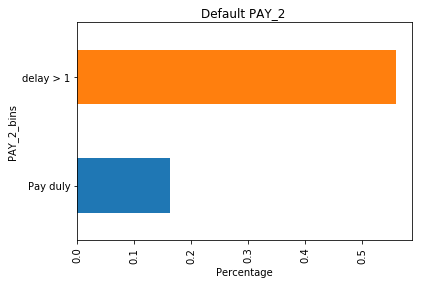

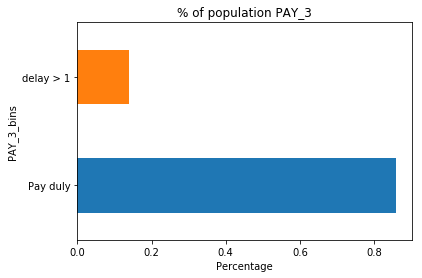

The default rate for each bin is exhibited in both the table and plot below:
PAY_3_range
Pay duly     0.171959
delay > 1    0.522927
Name: default_next_m, dtype: float64


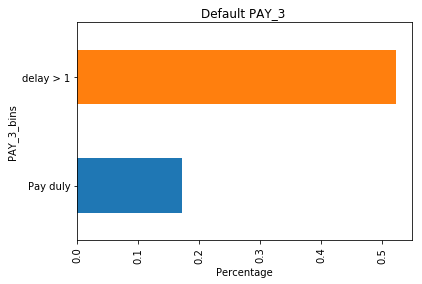

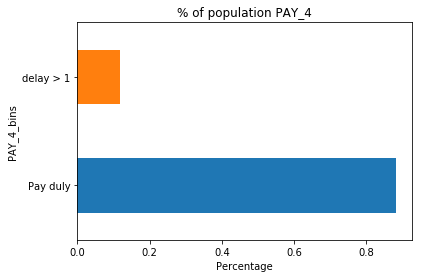

The default rate for each bin is exhibited in both the table and plot below:
PAY_4_range
Pay duly     0.179601
delay > 1    0.535348
Name: default_next_m, dtype: float64


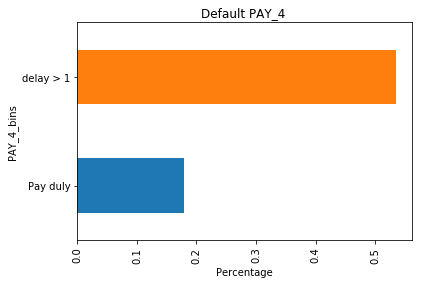

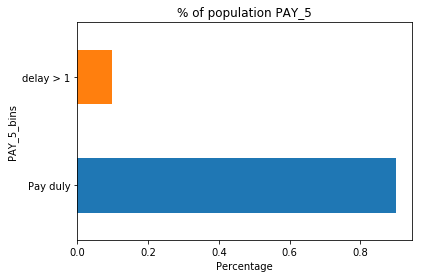

The default rate for each bin is exhibited in both the table and plot below:
PAY_5_range
Pay duly     0.184485
delay > 1    0.555593
Name: default_next_m, dtype: float64


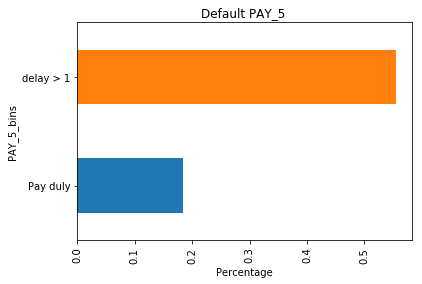

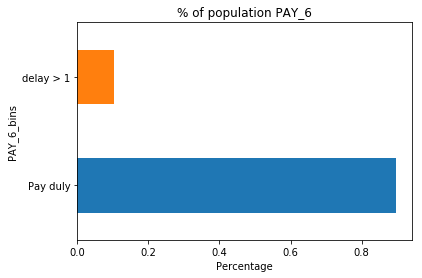

The default rate for each bin is exhibited in both the table and plot below:
PAY_6_range
Pay duly     0.186657
delay > 1    0.523222
Name: default_next_m, dtype: float64


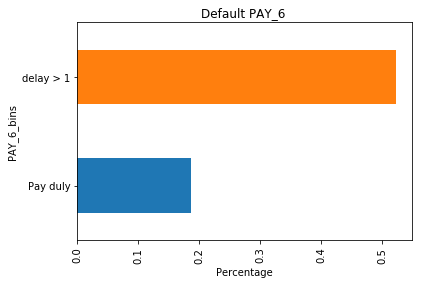

In [38]:
bivariate_v1(credit.PAY_1,'PAY_1_range',[-2.1,0,1,10],3,['Pay duly','delay 1 month ','delay > 1'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')

bivariate_v1(credit.PAY_2,'PAY_2_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_2_bins','% of population PAY_2','Default PAY_2 ')

bivariate_v1(credit.PAY_3,'PAY_3_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_3_bins','% of population PAY_3','Default PAY_3 ')

bivariate_v1(credit.PAY_4,'PAY_4_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_4_bins','% of population PAY_4','Default PAY_4 ')

bivariate_v1(credit.PAY_5,'PAY_5_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_5_bins','% of population PAY_5','Default PAY_5 ')

bivariate_v1(credit.PAY_6,'PAY_6_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_6_bins','% of population PAY_6','Default PAY_6 ')


>  We analyze the range of values for the continuous variables. The tables below are telling us that the minimum amount of credit granted starts from 10,000. The amount of bill statement can be negative, this means that the customer payed more than the requested amount during the month of analysis. Finally, the minimum value that the amount paid takes is zero, that represents the lack of payment. 



In [13]:
credit['LIMIT_BAL'].describe() 



count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [14]:
credit['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [15]:
credit['PAY_AMT1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

>The box plots that follow aim to help us identifying outliers for the continuous/ratio variables.

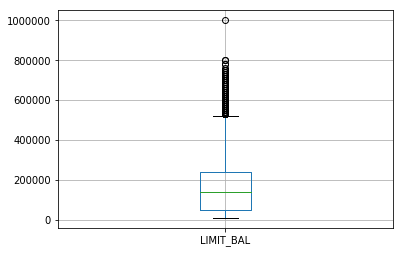

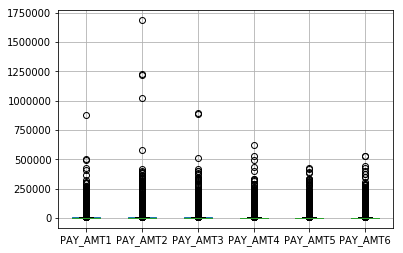

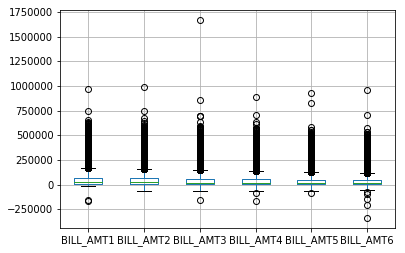

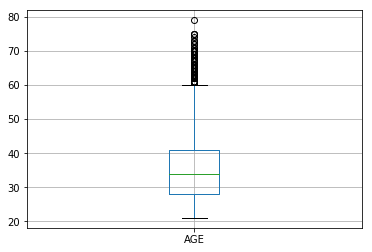

In [10]:
vars_to_plot_separate=[['LIMIT_BAL'],
                       ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
                       ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],   
                       ['AGE']  
                      ]


for index,plot_vars in enumerate(vars_to_plot_separate):
   
    ax=credit.boxplot(column=plot_vars,return_type='dict')
    plt.show()
                  

> The box plots confirm the presence of outliers for the ratio type variables. In order to mitigate this, we will define new variables in which we categorize the variable by creating bins with different default rate.  We first show the bins for the amount of credit given. The higher the amount of credit granted the lower the default rate. 

>The variable age exhibits expected values (ranging from 21 up to 79)

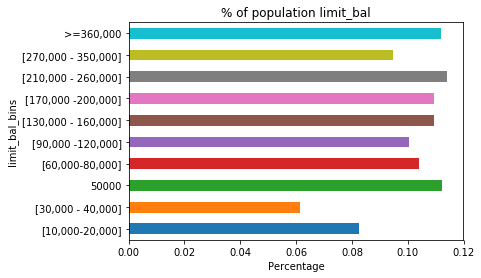

The default rate for each bin is exhibited in both the table and plot below:
limit_bal_range
[10,000-20,000]        0.362202
[30,000 - 40,000]      0.358696
50000                  0.263001
[60,000-80,000]        0.258085
[90,000 -120,000]      0.248589
[130,000 - 160,000]    0.198355
[170,000 -200,000]     0.174482
[210,000 - 260,000]    0.165499
[270,000 - 350,000]    0.141599
>=360,000              0.133452
Name: default_next_m, dtype: float64


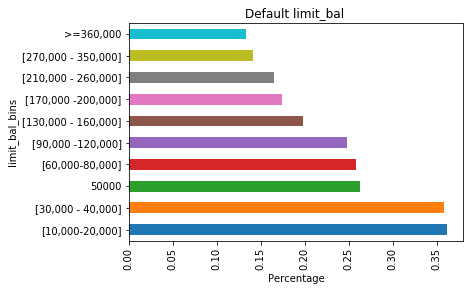

In [39]:
bivariate_v1(credit.LIMIT_BAL,'limit_bal_range',[0,20000,40000,50000,80000,120000,160000,200000,260000,350000,999999999],10,['[10,000-20,000]','[30,000 - 40,000]','50000','[60,000-80,000]','[90,000 -120,000]','[130,000 - 160,000]','[170,000 -200,000]','[210,000 - 260,000]','[270,000 - 350,000]','>=360,000'],'Percentage','limit_bal_bins','% of population limit_bal','Default limit_bal ')

> The definition of bins for the historical variables with the amount of bill statement are exhibited below. It is very interesting to see that this group does not exhibit very low default rate. It appears that customers with negative balance do not monitor the amount of the bill statement for the next month and they rely on the funds available which at the end are not enough and being  labeled as default in the next month.

>Moreover, there is not a strictly monotonic trend between the amount of the bill statement and the default rate. The  default rate increases as the bill amount increases but it gets to some point in which the default rate starts to decline. The former can be explained by customers that are receiving higher bills for which they cannot afford and they default the next month but there are other customers with high income who can afford a high amount of bill statement.

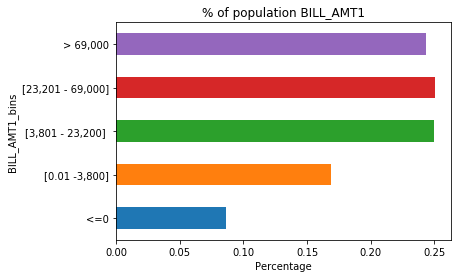

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT1_range
<=0                  0.247498
[0.01 -3,800]        0.220272
[3,801 - 23,200]     0.228964
[23,201 - 69,000]    0.224897
> 69,000             0.200738
Name: default_next_m, dtype: float64


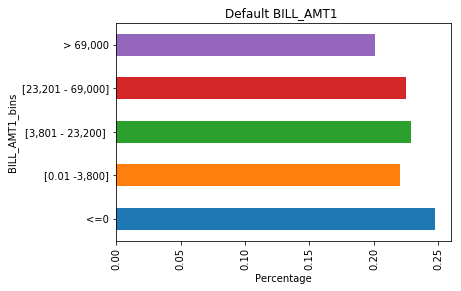

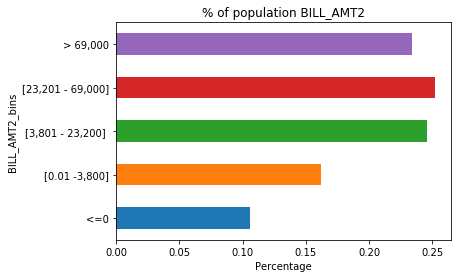

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT2_range
<=0                  0.234331
[0.01 -3,800]        0.217793
[3,801 - 23,200]     0.228037
[23,201 - 69,000]    0.227038
> 69,000             0.204134
Name: default_next_m, dtype: float64


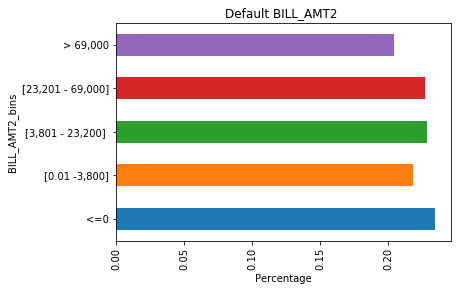

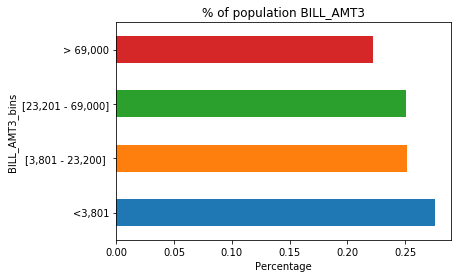

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT3_range
<3,801               0.223296
[3,801 - 23,200]     0.225113
[23,201 - 69,000]    0.231066
> 69,000             0.203116
Name: default_next_m, dtype: float64


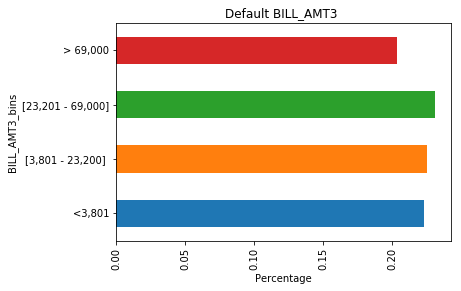

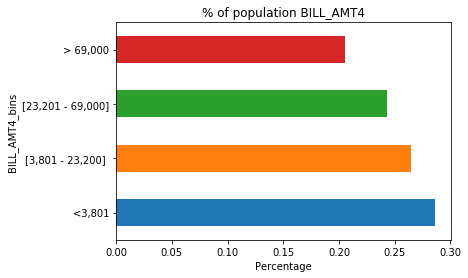

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT4_range
<3,801               0.222934
[3,801 - 23,200]     0.224164
[23,201 - 69,000]    0.228395
> 69,000             0.206455
Name: default_next_m, dtype: float64


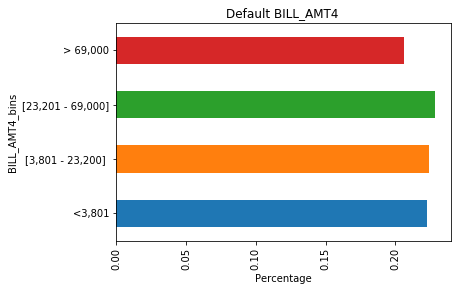

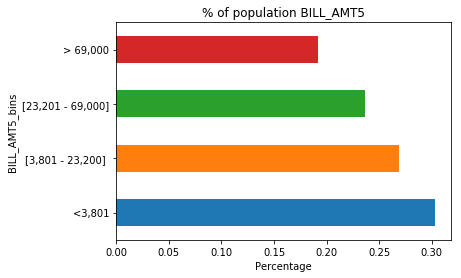

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT5_range
<3,801               0.221159
[3,801 - 23,200]     0.224181
[23,201 - 69,000]    0.230304
> 69,000             0.205816
Name: default_next_m, dtype: float64


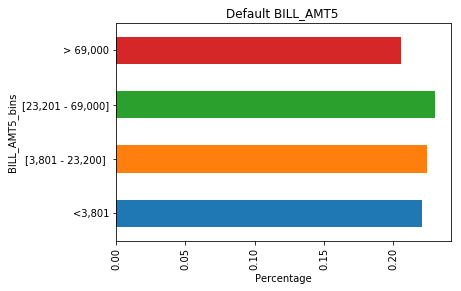

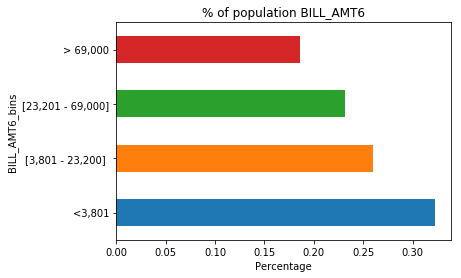

The default rate for each bin is exhibited in both the table and plot below:
BILL_AMT6_range
<3,801               0.217230
[3,801 - 23,200]     0.225269
[23,201 - 69,000]    0.231079
> 69,000             0.210063
Name: default_next_m, dtype: float64


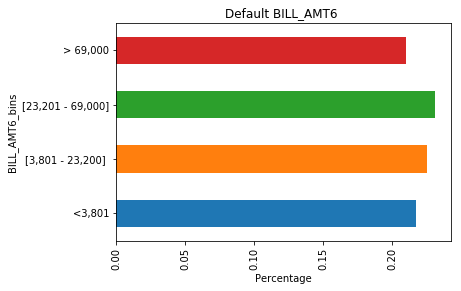

In [40]:
###### bIVARIATE PART II .  -- BILL AMOUNT


bivariate_v1(credit.BILL_AMT1,'BILL_AMT1_range',[-999999,0,3800,23200,69000,999999],5,['<=0','[0.01 -3,800]','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT1_bins','% of population BILL_AMT1','Default BILL_AMT1 ')

bivariate_v1(credit.BILL_AMT2,'BILL_AMT2_range',[-999999,0,3800,23200,69000,999999],5,['<=0','[0.01 -3,800]','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT2_bins','% of population BILL_AMT2','Default BILL_AMT2 ')

bivariate_v1(credit.BILL_AMT3,'BILL_AMT3_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT3_bins','% of population BILL_AMT3','Default BILL_AMT3 ')

bivariate_v1(credit.BILL_AMT4,'BILL_AMT4_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT4_bins','% of population BILL_AMT4','Default BILL_AMT4 ')

bivariate_v1(credit.BILL_AMT5,'BILL_AMT5_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT5_bins','% of population BILL_AMT5','Default BILL_AMT5 ')

bivariate_v1(credit.BILL_AMT6,'BILL_AMT6_range',[-999999,3800,23200,69000,999999],4,['<3,801','[3,801 - 23,200] ','[23,201 - 69,000]','> 69,000'],'Percentage','BILL_AMT6_bins','% of population BILL_AMT6','Default BILL_AMT6 ')


> The definition of bins for the historical variables with the amount paid are exhibited below. As expected, the higher the amount of the payment the lower the default rate.


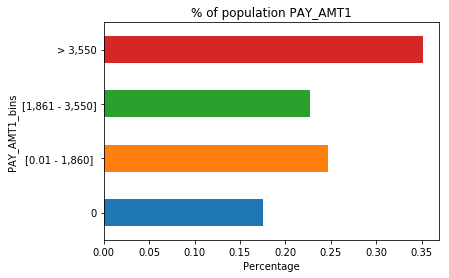

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT1_range
0                  0.359497
[0.01 - 1,860]     0.227082
[1,861 - 3,550]    0.215942
> 3,550            0.151538
Name: default_next_m, dtype: float64


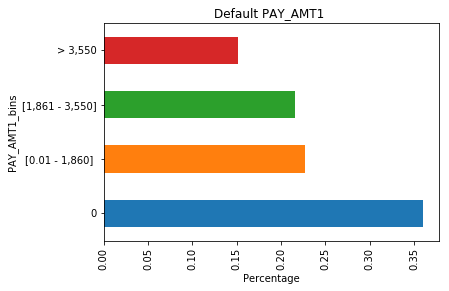

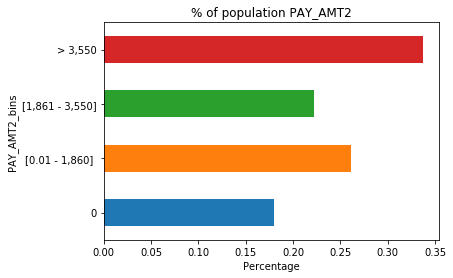

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT2_range
0                  0.333395
[0.01 - 1,860]     0.237719
[1,861 - 3,550]    0.215348
> 3,550            0.152415
Name: default_next_m, dtype: float64


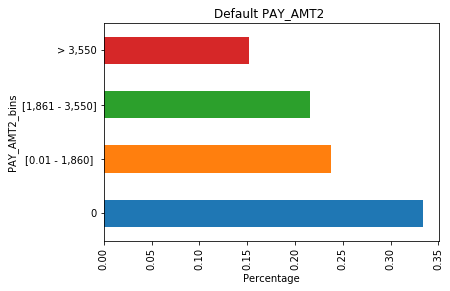

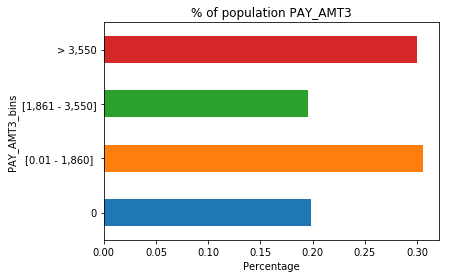

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT3_range
0                  0.323559
[0.01 - 1,860]     0.228603
[1,861 - 3,550]    0.208802
> 3,550            0.153940
Name: default_next_m, dtype: float64


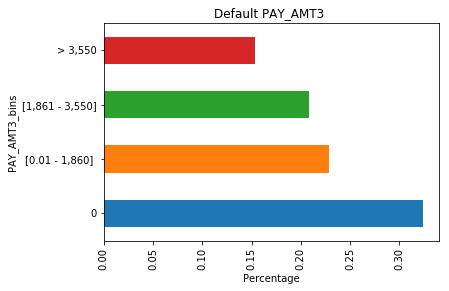

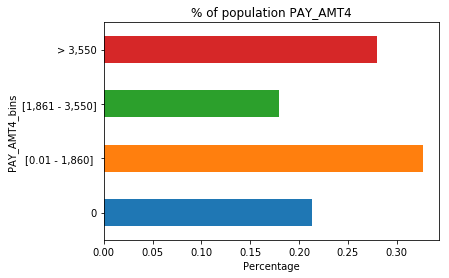

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT4_range
0                  0.311017
[0.01 - 1,860]     0.232136
[1,861 - 3,550]    0.196071
> 3,550            0.156071
Name: default_next_m, dtype: float64


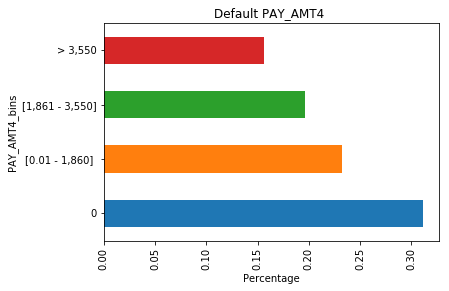

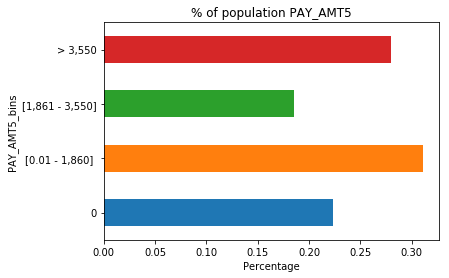

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT5_range
0                  0.293898
[0.01 - 1,860]     0.234145
[1,861 - 3,550]    0.206315
> 3,550            0.158734
Name: default_next_m, dtype: float64


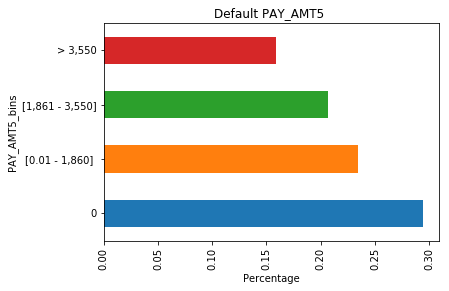

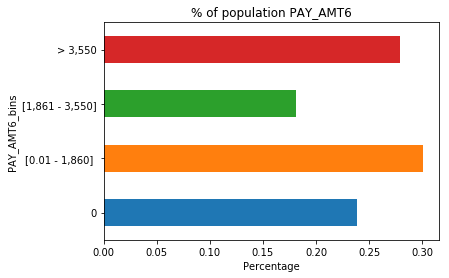

The default rate for each bin is exhibited in both the table and plot below:
PAY_AMT6_range
0                  0.289697
[0.01 - 1,860]     0.237271
[1,861 - 3,550]    0.207391
> 3,550            0.154186
Name: default_next_m, dtype: float64


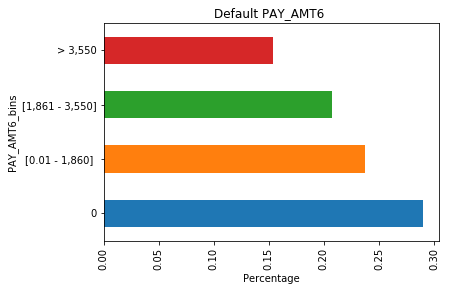

In [41]:
####BIVARIATE PART 3
bivariate_v1(credit.PAY_AMT1,'PAY_AMT1_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT1_bins','% of population PAY_AMT1','Default PAY_AMT1 ')

bivariate_v1(credit.PAY_AMT2,'PAY_AMT2_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT2_bins','% of population PAY_AMT2','Default PAY_AMT2 ')

bivariate_v1(credit.PAY_AMT3,'PAY_AMT3_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT3_bins','% of population PAY_AMT3','Default PAY_AMT3 ')

bivariate_v1(credit.PAY_AMT4,'PAY_AMT4_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT4_bins','% of population PAY_AMT4','Default PAY_AMT4 ')

bivariate_v1(credit.PAY_AMT5,'PAY_AMT5_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT5_bins','% of population PAY_AMT5','Default PAY_AMT5 ')

bivariate_v1(credit.PAY_AMT6,'PAY_AMT6_range',[-9,0,1860,3550,999999],4,['0','[0.01 - 1,860] ','[1,861 - 3,550]','> 3,550'],'Percentage','PAY_AMT6_bins','% of population PAY_AMT6','Default PAY_AMT6 ')


# <a name="Simple-Statistics"></a>Simple Statistics
*Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.*

In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_m
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


>Use describe to show a basic summary of the attributes

>From the 30,000 records, about 60.4% of the credit card users were female, and ages ranged from 21 to 79. Limit balances for the credit cards were as low as 10,000 and as high as 1,000,000 New Taiwan dollars.

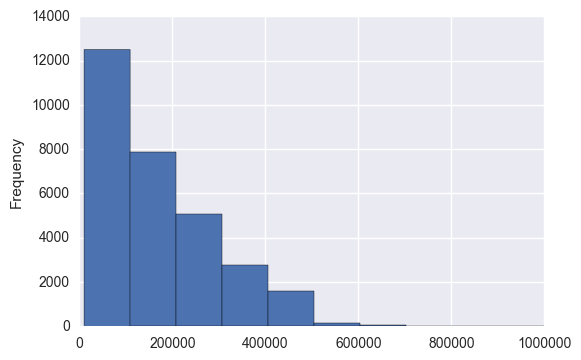

In [5]:
credit['LIMIT_BAL'].plot.hist()

In [6]:
credit['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

>A histogram of the limit balance attribute shows that a majority of the credit cards accounts have the minimum credit limit of 10,000 NT dollars.

>Using the summary statistics above, the average account has a limit of 167,484 NT dollars. The average bill amount for the credit users is 51,223 NTD, while the average payment amount is 5,664 NTD.

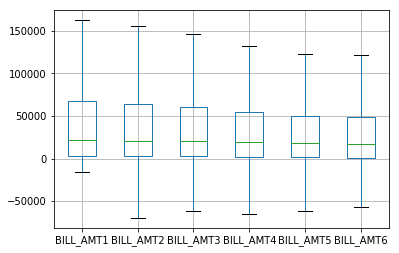

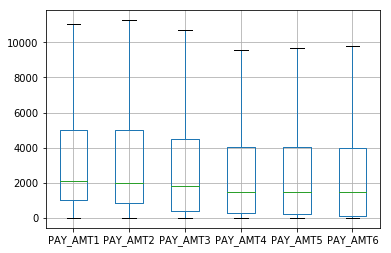

In [42]:
# new dataframe for bill amounts
credit_billAmounts = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
# new dataframe for payment amounts
credit_paymentAmounts = credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# boxplots of bill amounts
df = credit_billAmounts
fig, ax = plt.subplots()
box = df.boxplot(ax=ax, sym='',return_type='dict') 
ax.margins(y=0.05)
plt.show()

# boxplots of the payment amounts
df = credit_paymentAmounts
fig, ax = plt.subplots()
box = df.boxplot(ax=ax, sym='' ,return_type='dict') 
ax.margins(y=0.05)
plt.show()

>From the boxplots of bill amounts, the plots show a similar range month to month. Credit users generally have a positive amount due between roughly 0 and 75,000 NTD. In fact, the lowest first quartile for the bill amount due occurs in month 6 with a bill amount of 1,256 NTD. The highest third quartile for bill amount due occurs in month 1 with a bill amount of 67,071 NTD.

> Similar to the bill amounts, the payment amounts share a similar distribution of dollar amounts, but significantly below the threshold of the bill amounts. Credit users typically pay in an amount between 0 and just over 4,000 NTD each month. The lowest first quartile of payments occurs in month 6 with a payment amount of 117 NTD. The lowest quartile for payment amount corresponds to the lowest bill amount first quartile in month 6 as well. The highest third quartile of payment amount also occurs in month 1 with a payment of 5,006 NTD. Similarly, the highest third quartile for payment coincides with the highest third quartile for amount due.

In [26]:
# Group defaults by sex and describe
bySex = credit.groupby('SEX')
bySex['default_next_m'].describe()

SEX       
1    count    11888.000000
     mean         0.241672
     std          0.428115
     min          0.000000
     25%          0.000000
     50%          0.000000
     75%          0.000000
     max          1.000000
2    count    18112.000000
     mean         0.207763
     std          0.405717
     min          0.000000
     25%          0.000000
     50%          0.000000
     75%          0.000000
     max          1.000000
Name: default_next_m, dtype: float64

>A difference can be identified when grouping the default credit card users by sex. While there are more females in the dataset, a smaller percentage of the users default on average. Only 20.7% of female users default on their credit cards, while 24.2% of males default.

In [25]:
# Group defaults by education and describe
byEducation = credit.groupby('EDUCATION_INP')
temp = byEducation['default_next_m']
byEducation['default_next_m'].describe()

EDUCATION_INP       
1              count    10585.000000
               mean         0.192348
               std          0.394163
               min          0.000000
               25%          0.000000
               50%          0.000000
               75%          0.000000
               max          1.000000
2              count    14030.000000
               mean         0.237349
               std          0.425473
               min          0.000000
               25%          0.000000
               50%          0.000000
               75%          0.000000
               max          1.000000
3              count     4917.000000
               mean         0.251576
               std          0.433963
               min          0.000000
               25%          0.000000
               50%          0.000000
               75%          1.000000
               max          1.000000
4              count      468.000000
               mean         0.070513
               st

>Similarly, differences become apparent when grouping default credit card users by education level. Users with graduate level education default less often than those with only undergraduate education, who default less often then those with only high school education. While all the known educations level hover at an average default rate between 19-25%, the small number of users of unknown education levels grouped in the "others" category have a default rate of about 7%, significantly lower than the other categories. A vast majority of the users, about 82%, have at least a university level education, however.

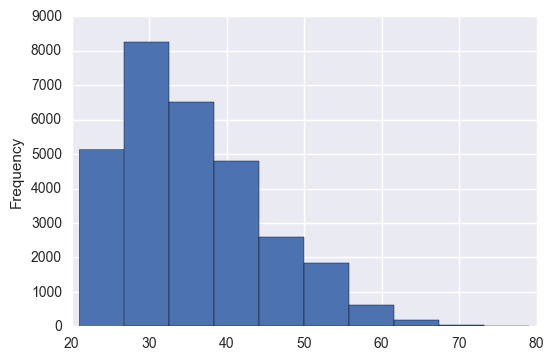

In [27]:
credit['AGE'].plot.hist()

>Looking at the broader age range, a majority of the credit card users are in their 20s and 30s, with the highest concentration of ages between 27 and 32 years. 

# <a name="Visualize-Attributes"></a>Visualize Attributes
*Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate*

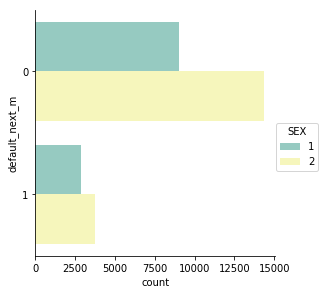

In [16]:
# Factorplot
# Source:
# https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
# Count plot of credit default by sex
plt.figure()
g = sns.factorplot(hue='SEX', palette="Set3", y="default_next_m", data=credit, kind="count")

> The above factor plot displays the overall count of whether or not a customer has defaulted on their credit, based on their sex. From this plot we can see that the data set contains more female observations (Sex = 2) as both lima-bean colored bars are greater than the turquoise bars representing males (Sex = 1).

> Even though there are more female observations who have defaulted on their credit, the difference is marginal. With this in mind, the proportion of females with default credit is smaller than males with default credit.

> A factor plot is appropriate for showing the counts of a variable, in this case whether or not the customer has defaulted, broken up be specific subcategory such as sex.

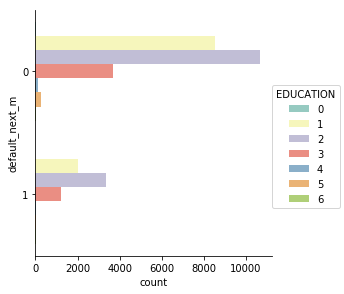

In [17]:
# Factorplot
# Source:
# https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
# Count plot of credit default by education
plt.figure()
g = sns.factorplot(hue='EDUCATION', palette="Set3", y="default_next_m", data=credit, kind="count")

> The above factor plot displays the overall count of credit default status by the levels of education. The relative distribution of college and high school educated appears to be equal across credit defaulters and non-defaulters. It is apparent that the data set is imbalanced in favor of customers who have not defaulted.

> Tangentially, this suggests cross-validation should stratification when testing for accuracy. Even with the imbalance, the proportional distribution of non-defaulters is far greater than defaulters. Perhaps this suggests that the amount of education has an impact on financial management.

> A factor plot is appropriate we are simply showing the overall distribution counts of credit default status by education level.

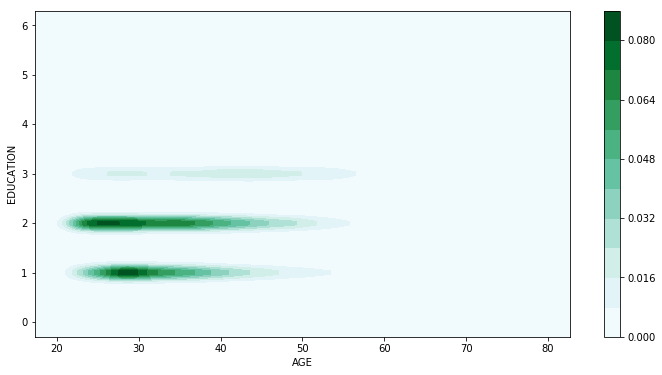

In [18]:
# KDE plot
# Source:
# https://seaborn.pydata.org/examples/multiple_joint_kde.html
plt.figure(figsize=(12, 6))
x = credit.AGE
y = credit.EDUCATION
ax = sns.kdeplot(x, y, cbar=True, shade=True)

> The above kernel density estimation plot displays distribution of age among the different education levels. It would appear that the highest density of individuals with a graduate level of education are in their late 20's to early 30's. Additionally, the highest density of individuals with a college level of education are in their early-to-middle 20's. Lastly, while faint the major density of high school educated individuals appear to be anywhere from their middle 30's to early 50's.

> A kernel density estimation plot is appropriate because it is a more effective way to view the distribution of a variable.

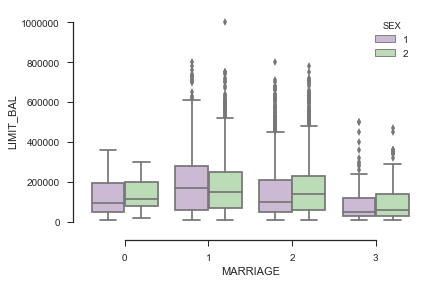

In [19]:
# Nested boxplots showing limit balance by relationship status per sex
# Source:
# https://seaborn.pydata.org/examples/grouped_boxplot.html
sns.set(style="ticks")
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=credit[credit.columns[:25]], palette="PRGn")
sns.despine(offset=10, trim=True)

> The above nested box plot reflects the limit balance of customers based on relationship status and sex. Married, single customers exhibit similar inter quartile ranges for both genders. However, married customers appear to have a higher maximum limit balance for both genders. The potential presence of outliers for large limit balances is further evidence to suggest transformation of the data easy concerns of normality.

> A nested box plot is appropriate when examining the quartiles and outliers of a factorized variable.

# <a name="Explore-Joint-Attributes"></a>Explore Joint Attributes
*Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

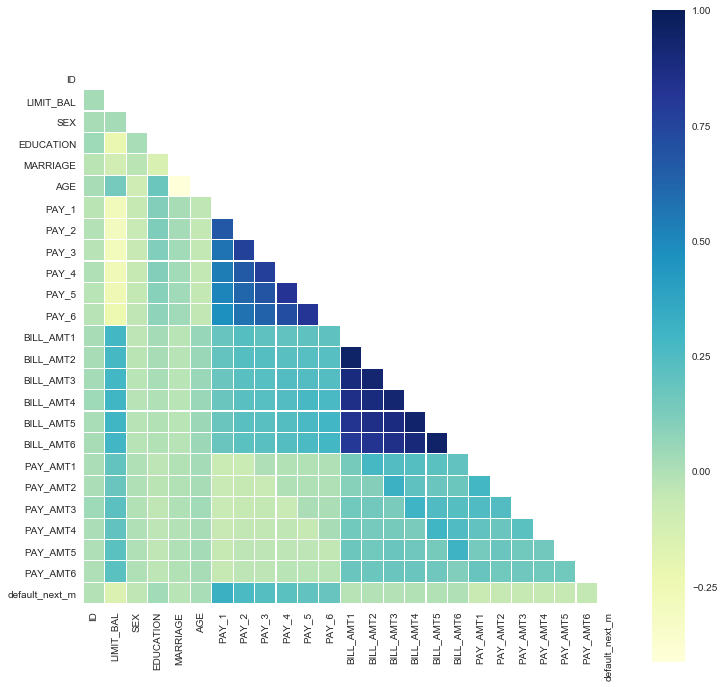

In [31]:
# Correlation heat map matrix
# Source:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
corr = credit.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12, 12))
    credit_heatmap_corr = sns.heatmap(corr, mask=mask, square=True,
                                    linewidths=.1, cmap="YlGnBu")

> The above correlation heat map matrix provides an easily digestable and visually appealing manner in which to discern the relationships between attributes present within the credit default data set.

> The first noticeable pattern one might take note of is the 2 smaller dark blue triangles. These two triangles reflect the multicollinearity present within the PAY_X and BILL_AMTX attributes. Each bill amount attribute (BILL_AMTX) is nearly, if not completely, correlated with one another. Likewise, the lowest correlation coefficient among repayment status attributes (PAY_X) is approximately 0.50.

> Such high correlation among similiar attributes lends credence to the notion of creating new features based on the cumalative average from said like-minded attributes. Doing so would reduce collinearity concerns while at the same time prevent over-fitting when constructing the logistic regression model.

> Another pattern of note is the moderate-to-strong positive correlation between BILL_AMTX and LIMIT_BAL. On one hand it is common sense to reason that credit billing amount and available credit would be correlated. However, it is surprising that the two attributes are not more heavily correlated.

> Not so surprising is the moderate-to-strong positive correlation present between each of the BILL_AMTX attributes and each of the PAY_X attributes. Certainly the amount of credit due from the customer has an impact on the repayment status of said credit. In other words, a larger credit bill is more likely to be defaulted upon. It is important to note that a large credit bill does not necessarily mean that the customer has bad credit.

In [18]:
corr = credit.corr()
print(corr.default_next_m)

ID               -0.013952
LIMIT_BAL        -0.153520
SEX              -0.039961
EDUCATION         0.028006
MARRIAGE         -0.024339
AGE               0.013890
PAY_1             0.324794
PAY_2             0.263551
PAY_3             0.235253
PAY_4             0.216614
PAY_5             0.204149
PAY_6             0.186866
BILL_AMT1        -0.019644
BILL_AMT2        -0.014193
BILL_AMT3        -0.014076
BILL_AMT4        -0.010156
BILL_AMT5        -0.006760
BILL_AMT6        -0.005372
PAY_AMT1         -0.072929
PAY_AMT2         -0.058579
PAY_AMT3         -0.056250
PAY_AMT4         -0.056827
PAY_AMT5         -0.055124
PAY_AMT6         -0.053183
default_next_m    1.000000
Name: default_next_m, dtype: float64


>After looking at the correlation heat map matix, there is an interesting relationship between the pay status for each month and the likeness of an induvial will default payment in the next month. Furthermore, when taking a deeper look at the percentages, the top 6 attributes correlating if someone is likely to default falls under the pay status, variable PAY_0 – PAY_6. Also note, the correlation increases the more recent the pay status is to the next predicted month. This shows that if last month they defaulted they will do the same next month as well as if they did not default then they are likely to not default the next month. 

>In addition, Age has a very low correlation to predict if someone will default on their payment with a 1.38% correlation. Furthermore, the bill amount also has the weakest correlation if some one will default or not. This means, whether or not someone owes a lot or vey little money is not a good predictor if they will default on their next month’s payment.  


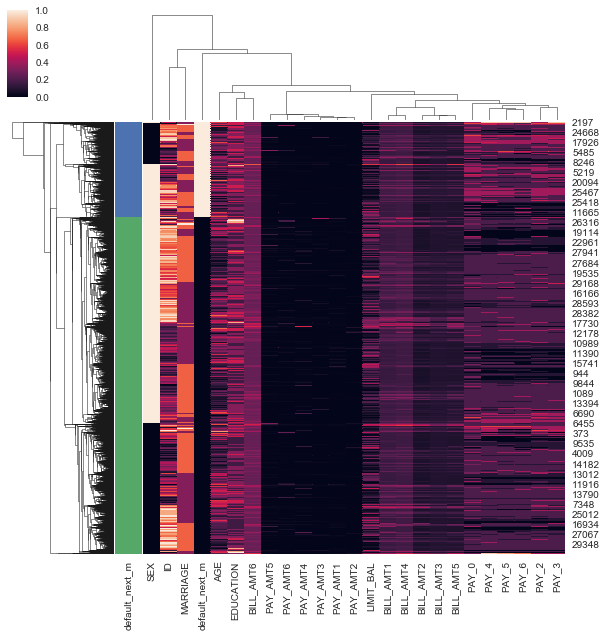

In [27]:
# Cluster Heat Map
# Source:
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
plt.figure()
sns.set(color_codes=True)
y_defaults = credit.default_next_m
lut = dict(zip(y_defaults.unique(), "bg"))
row_colors = y_defaults.map(lut)
g = sns.clustermap(credit, row_colors=row_colors, standard_scale=1)

> The hierarchical clustered heat map displayed above provides insight into the variability present within the data set. Hierarchical clustering is applied to both the variables and observations (columns and rows respectively). Moreover, the variables are standardized to avoid a situation wherein clustering occurs purely due to distance between observations.

> The dendogram located on the top of the plot cleanly splits the variables. The large swath of black present in the plot indicates that the payment of amounts of customers throughout the year are categorically uncorrelated.

> Observations in which the customer defaulted on their credit is represented by the blue rows. In contrast, observations in which the customer did not default on their credit is represented by the green rows. It is visually apparent that the data set is imbalanced with the overrepresentation of non-defaulting customers.

> The large swatch of tan within the sex column is accompanied by varying chunks of orange and purple blocks within the marriage column. The legend in the above plot represents high, moderate-to-strong, and moderate correlations by tan, orange, and purple respectively. Consequently this overlap of swatches between sex and marriage suggests that perhaps one gender is more likely to have a certain relationship status than another.

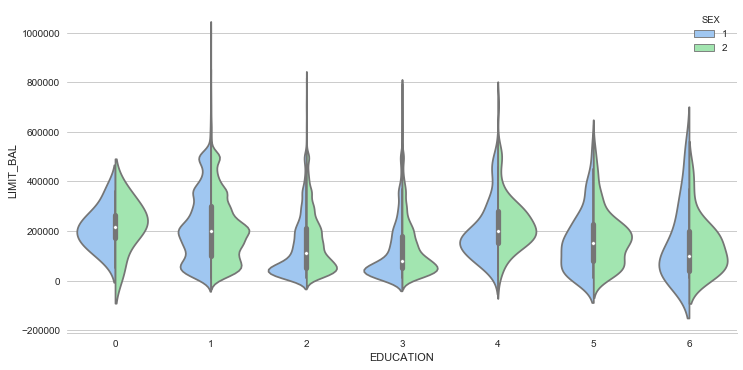

In [28]:
# Violin plot of limit balance distribution by education level per sex
# Source:
# http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)

> The violin plot displayed above reflects the distributions of limit balances by education levels per sex. This plot provides a bevy of great insights as to the composition of the data set.

> Although levels 0, 5, and 6 are undocumented values for the education attribute, their distributions are remarkably similar to the other category (level 4). This is solid evidence to support the imputation of levels 0, 5, and 6 as other as well. In other words, it is reasonable to combine levels 0, 4, 5, and 6 into a conglomerate for the other category. Furthermore, from a logical perspective, the classification “0”,”5” and “6” means they are not in “1”, “2” and “3”. Taking this one step further, this means the education levels are something other than “1”, “2” and “3” and  would fall in the “everything else” or the category 4('other').


> Graduate, university, and high school levels of education (levels 1, 2, and 3 respectively) are skewed towards higher limit balances (right-skewed or left-skewed depending on your point of view). The distribution of limit balances from graduate level educated customers is very odd with many peaks and valleys as it skews towards greater limit balances.

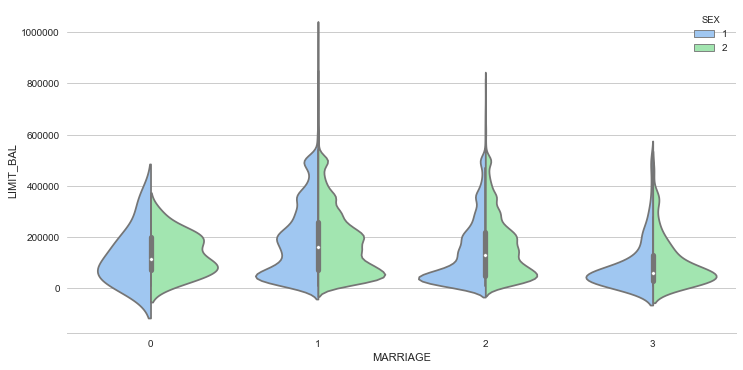

In [11]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)
plt.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/violin-limitbalance-by-marriage-per-sex')

> The violin plot above reflects the distributions of limit balances by relationship status per sex. Married and single individuals (1 and 2 respectively) of both genders appear to have some outliers. Consequently, the married and single violin plots are heavily skewed towards large limit balances with very long tails. This gives some consideration for data set transformation when the time comes for model building.

# <a name="Explore-Attributes-and-Class"></a>Explore Attributes and Class
*Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

> In the section "Data Quality" it has been already discussed the relationship between the default rate and the ratio/interval variables given the necessity of categorizing them to address outliers. Moreover, the variable with the historical payment status of the client was imputed based on the relationship with the default rate.

>In this section, we will explore the relationship with the default for the variables not yet analyzed: AGE, SEX, EDUCATION, and MARRIAGE.

> The relationship between "AGE" and default is presented below. Younger customers are less educated in financial matters and as expected the default rate is high. Customers between 26 and 48 years old keep on average the same default rate. Finally, elderly customers (greater than 48) are more delinquent in payments. Elderly customers may face difficulties finding a job or reduction in the income after retirement may damage their credit quality.



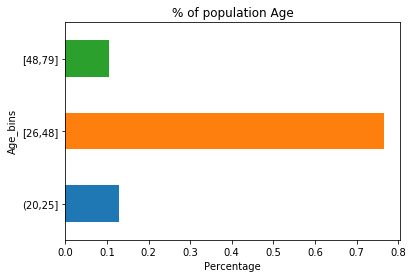

The default rate for each bin is exhibited in both the table and plot below:
AGE_range
(20,25]    0.266598
[26,48]    0.209027
[48,79]    0.254470
Name: default_next_m, dtype: float64


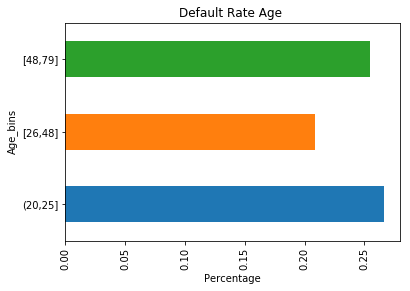

In [43]:
bivariate_v1(credit.AGE,'AGE_range',[0,25,48,100],3,['(20,25]','[26,48]','[48,79]'],'Percentage','Age_bins','% of population Age','Default Rate Age ')


> As expected, the Higher the degree of education the lower the default rate. The category "Others", exhibit very low default rate. However, it represents less than 5% of the total population according to the charts below:

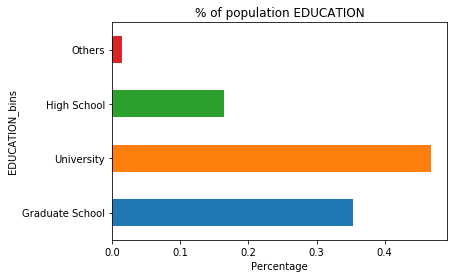

The default rate for each bin is exhibited in both the table and plot below:
EDUCATION_range
Graduate School    0.192348
University         0.237349
High School        0.251576
Others             0.072687
Name: default_next_m, dtype: float64


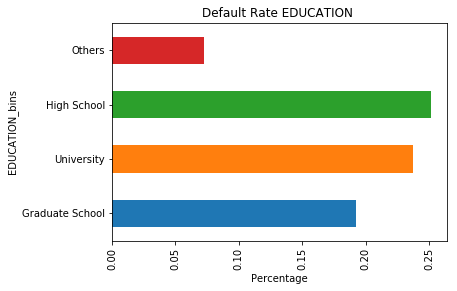

In [44]:
bivariate_v1(credit.EDUCATION,'EDUCATION_range',[0,1,2,3,99],4,['Graduate School','University','High School','Others'],'Percentage','EDUCATION_bins','% of population EDUCATION','Default Rate EDUCATION ')


> Women exhibit a lower default rate. It is very important to point out that regulations in the USA prevent banks using the variables of sex, education and marital status in their loan origination process.

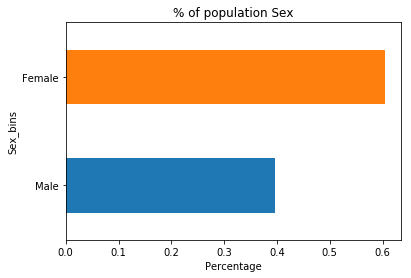

The default rate for each bin is exhibited in both the table and plot below:
SEX_range
Male      0.241672
Female    0.207763
Name: default_next_m, dtype: float64


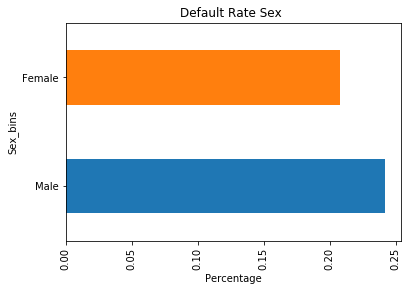

In [45]:
bivariate_v1(credit.SEX,'SEX_range',[0,1,3],2,['Male','Female'],'Percentage','Sex_bins','% of population Sex','Default Rate Sex ')


> Finally, marital status is analyzed against the default rate. Single borrowers present the lowest default rate. A married couple may tend to default given the fact that the income has to be distributed to other members of the family (e.g. kids, not working wife, etc).

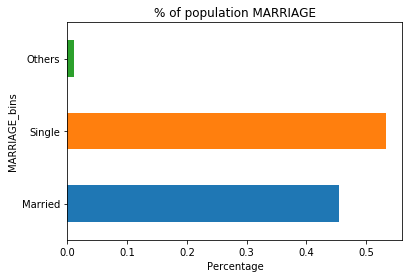

The default rate for each bin is exhibited in both the table and plot below:
MARRIED_range
Married    0.234717
Single     0.208890
Others     0.260062
Name: default_next_m, dtype: float64


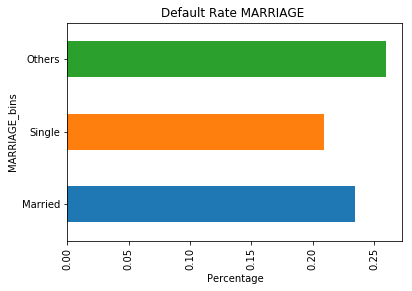

In [46]:
bivariate_v1(credit.MARRIAGE_INP,'MARRIED_range',[0,1,2,4],3,['Married','Single','Others'],'Percentage','MARRIAGE_bins','% of population MARRIAGE','Default Rate MARRIAGE ')


# <a name="New-Features"></a>New Features
*Are there other features that could be added to the data or created from existing features? Which ones?*



> As pointed out in previous sections, the historical variables provided appear to be serially correlated. Therefore, we are proposing to calculate the average of the history of the variables. Moreover, when developing a model, it is important to take into account the impact of the inflation for variables that represent monetary value. The model may have to be monitored periodically to validate that the inflation does not affect the performance. A way to overcome this is to create proportions of a monetary variable which eliminates the effect of inflation.



> Two proportions are proposed: 

>> 1) Average amount of bill statement / limit balance

>> 2) Average amount paid / limit balance



> The plots below exhibit the relationship between these two variables with the default rate.  The higher the proportion of average amount of bill / limit balances the higher the default rate. Conversely, the higher the amount paid vs the limit balance the lower the default rate.


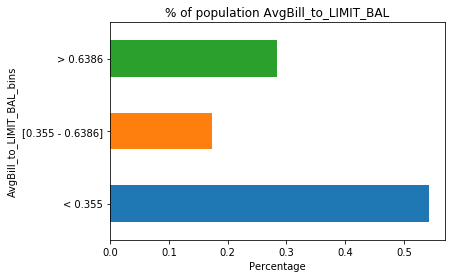

The default rate for each bin is exhibited in both the table and plot below:
AvgBill_to_LIMIT_BAL_range
< 0.355             0.179902
[0.355 - 0.6386]    0.230606
> 0.6386            0.294200
Name: default_next_m, dtype: float64


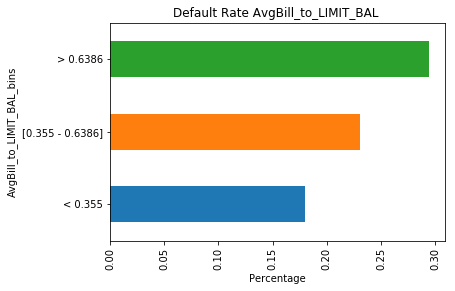

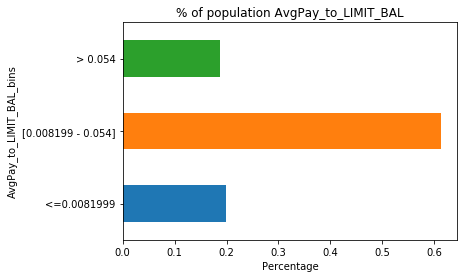

The default rate for each bin is exhibited in both the table and plot below:
AvgPay_to_LIMIT_BAL_range
<=0.0081999           0.246435
[0.008199 - 0.054]    0.225325
> 0.054               0.180995
Name: default_next_m, dtype: float64


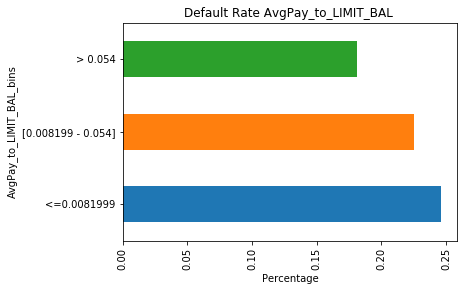

In [47]:
############## CREATING NEW VARIABLES

#average of hte bill amount
credit['Avg_BILL']=(credit['BILL_AMT1']+credit['BILL_AMT2']+credit['BILL_AMT3']+ credit['BILL_AMT4']+credit['BILL_AMT5']+credit['BILL_AMT6']
               )/float(6)


#Average of the Payment amount

credit['Avg_PAY']=(credit['PAY_AMT1']+credit['PAY_AMT2']+credit['PAY_AMT3']+credit['PAY_AMT4']+credit['PAY_AMT5']+credit['PAY_AMT6']
               )/float(6)

#We are constructing the ratio with the average BILL AMOUNT TO LIMIT
credit['AvgBill_to_LIMIT_BAL']=(credit['Avg_BILL']/credit['LIMIT_BAL'])


#We are constructing the ratio with the  average PAYMENT AMOUNT TO LIMIT
credit['AvgPay_to_LIMIT_BAL']=(credit['Avg_PAY']/credit['LIMIT_BAL'])

#plotting the relationships with the default
###########################  BIN CREATION FOR THE NEW 2 RATIOS        #####################

bivariate_v1(credit.AvgBill_to_LIMIT_BAL,'AvgBill_to_LIMIT_BAL_range',[-999999,0.355,0.6386,999999],3,['< 0.355','[0.355 - 0.6386]','> 0.6386'],'Percentage','AvgBill_to_LIMIT_BAL_bins','% of population AvgBill_to_LIMIT_BAL','Default Rate AvgBill_to_LIMIT_BAL ')

bivariate_v1(credit.AvgPay_to_LIMIT_BAL,'AvgPay_to_LIMIT_BAL_range',[-999999,0.0081999,0.054,999999],3,['<=0.0081999','[0.008199 - 0.054]','> 0.054'],'Percentage','AvgPay_to_LIMIT_BAL_bins','% of population AvgPay_to_LIMIT_BAL','Default Rate AvgPay_to_LIMIT_BAL ')





# <a name="Exceptional-Work"></a>Exceptional Work
*You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

> Along with spending easily 20 hours on this project, believe there is plethora of little things that add up to a create a polished professional project. In particular, Markdown formatting was utilized to a moderately advanced degree to create a clean and smooth structure flow to the project.

> The Table of Contents section links to each subsection of the project within this Jupyter notebook. Additionally, hyperlinks were incorporated via Markdown to link to each team members GitHub profile page. Moreover, table formatting within Markdown lends to a clear presentation format for describing the meaning and type of data for each attribute in the data file.

In [3]:
# Build the logistic regression
# Source:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Find total number of columns
len(credit.columns)

# Set X variables for the model
# Slices all attributes except for 'default_next_m' into X
X = credit[credit.columns[:24]]

# Set Y variable for the model
Y = credit['default_next_m']

# Recursive Feature Selection for the top 10 performing variables
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

print(fit)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)
Number of Features: 10
Selected Features: [False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False]
Feature Ranking: [ 4 12  1  1  1  1  1  1  1  1  1  1  5  6 13 11 15 10  2  3  9  7  8 14]


# <a name="References"></a>References
* Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
* https://pandas.pydata.org/pandas-docs/stable/api.html
* https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients